In [1]:
# In this analysis, I have done the exploratory analysis on Adult Dataset post that I have tested the scores of different 
# classification algorithms. Dataset can be found on https://archive.ics.uci.edu/ml/datasets.php

#Attributes INformation:

#Output Decisions: salary:  >50K, <=50K.
#age: continuous.
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#fnlwgt: continuous.
#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 
# 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#education-num: continuous.
#marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,
# Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#sex: Female, Male.
#capital-gain: continuous.
#capital-loss: continuous.
#hours-per-week: continuous.
#native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
# Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
# Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland,
# Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#Prediction task is to determine whether a person makes over 50K a year.

In [2]:
# load the dataset, remove headers, set the names
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


df=pd.read_csv("D:/2020/Python/ML/Datasets/Classification/adult.data", header=None, na_values='?',
              names=['age','workclass','fnlwgt','education','education-num',
                     'marital-status','occupation','relationship','race','sex',
                     'capital-gain','capital-loss','hours-per-week','native-country','salary'])
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Cleaning Data
# We found " ?" in the following 3 attributes 
df['workclass'].value_counts() 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [6]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [7]:
# In all these 3 attributes, replace the "?" with the mode as it makes no major diffrence
a = df['workclass'].value_counts()
df['workclass'][df['workclass']==' ?'] = a.sort_values(ascending=False).index[0]

b = df['native-country'].value_counts()
df['native-country'][df['native-country']==' ?'] = b.sort_values(ascending=False).index[0]

c = df['occupation'].value_counts()
df['occupation'][df['occupation']==' ?'] = c.sort_values(ascending=False).index[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__m

In [8]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
# EDA and general analysis
# education-num seems to have a weight built depending upon education, so we can skip that. Let us fous on the numeric
# data first
dfn = df.drop(['education-num','salary'], axis=1)
dfn.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


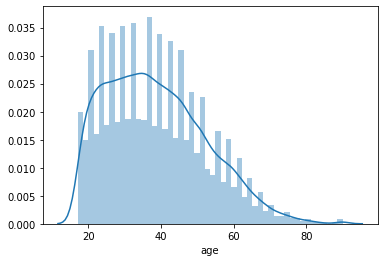

In [10]:
# From the above tbale, we see age spreads from 17 to 90. Difference between 1st quartile and the minimum is not huge but
# difference between 3rd quartile and max is huge. Also it shows that 75% age lies around 48 but after 48, age is dispersed 
# a lot. It shows that the curve is skewed right as maximum data lies in the left. lets visualize age as follows.
sb.distplot(df['age']) #shows right skewed curve

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

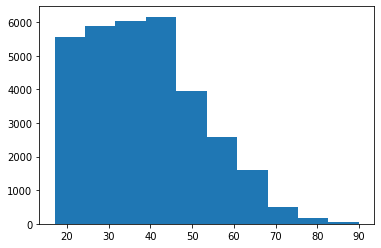

In [11]:
plt.hist(df['age'])
# Right skewed, very less population after 70 which is quite obvious as in those years of age, very less people work.
# Mostly, from age 19 to age 45, people are engagged in working.

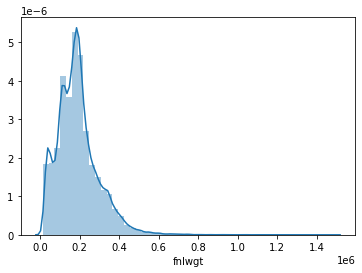

In [12]:
# fnlwgt is sample weight, it has a huge difference between median and max value, it is also right skewed.
sb.distplot(df['fnlwgt'])

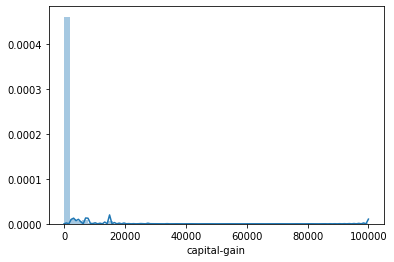

In [13]:
sb.distplot(df['capital-gain']) # Capital gain shows that maximum values are 0, very less values are set to high values 
# which shows that gain is either mostly 0 or very large till 99k hence the stanard deviation is very large

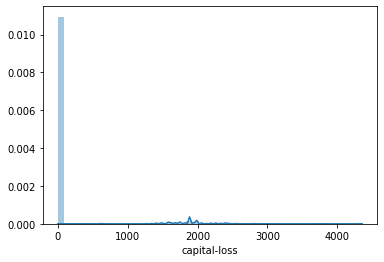

In [14]:
# capital-loss is just same as capital-gai, maximum concentrated on 0, has mean greater than median(0), which shows its a right 
# skewed curve
sb.distplot(df['capital-loss'])

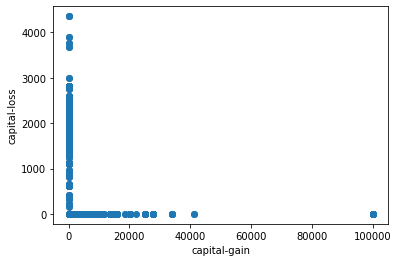

In [15]:
# Lets check relation between capitalgain vs capital loss
plt.scatter(df['capital-gain'],df['capital-loss'])
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()
# Obviously it shows, for high gain, loss is from 0 to high and vice versa. Loss and gain both can be 0. Mostly it is 0 or high

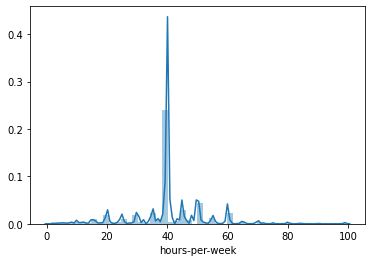

In [16]:
# hours-per-week: 75% people seems to work for 40-45 hours. It varies from an hour to 99 hours per week which shows large
# variation. Very less people work for up to 99 hours/week. Quartiles shows that the distribution is mostly normal. This
# attribute can be further more analysed.
sb.distplot(df['hours-per-week'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

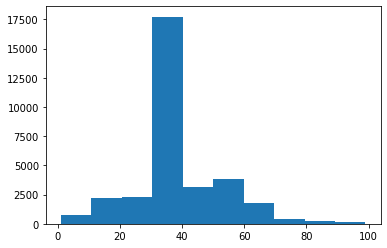

In [17]:
plt.hist(df['hours-per-week'])
# Maximum people work for 35 to 40 hours, very less people work for more than 80 hours which is not usual. Most population works
# upto 45 hours-around 75%.

In [18]:
# let us see the object attributes
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


In [19]:
# Majority of workclass if from Private sector. Race is biased more towards white race, maximum males are involves in
# the earning process. The maximum data seems biased to US as majority of data belongs to US, rest is divided in 41 other
# native-countries.

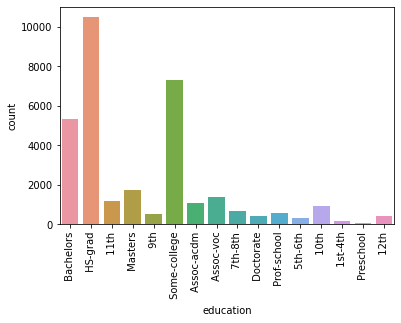

In [20]:
x = sb.countplot(df['education'])
x.set_xticklabels(df['education'].unique(), rotation=90) # you have to be specific here as df.value_counts() give the sorted 
plt.show() # descending arder and countplot plots simply by the sequence, not by sorted order so x-axs & y-axis values may
           # mismatch

In [21]:
# Above plot shows there are 16 categories of education out of which, maximum are HS-Grads who are engagged in earning, followed
# by people who belong to Some-College. Least working population are from Preschool which is quite obvious. 

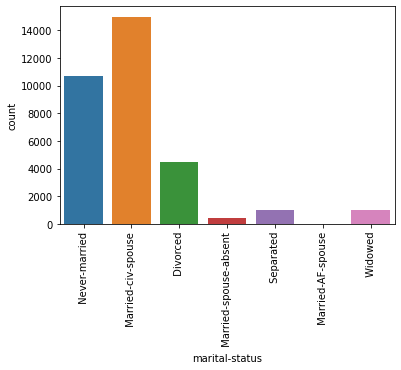

In [22]:
y = sb.countplot(df['marital-status'])
y.set_xticklabels(df['marital-status'].unique(), rotation=90)
plt.show()

In [23]:
# Above plot shows maximum Married civil spouses are engagged in earning followed by Never-Married ones. These two categories
# dominates in all 7 categories. Least are from Armed forces spouses

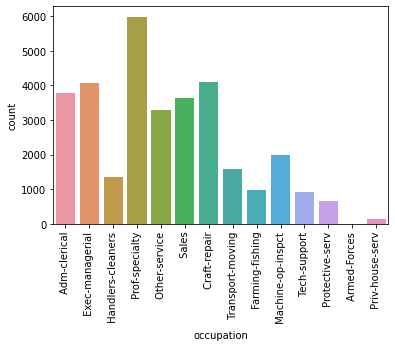

In [24]:
y = sb.countplot(df['occupation'])
y.set_xticklabels(df['occupation'].unique(), rotation=90)
plt.show()

In [25]:
# Above plot shows 14 profession out of which maximum people engagged in earning are from Prof-Speciality group. Least are
# from Armed forces. 

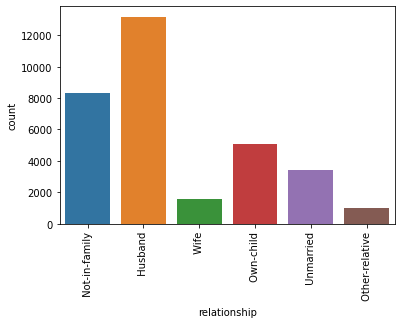

In [26]:
y = sb.countplot(df['relationship'])
y.set_xticklabels(df['relationship'].unique(), rotation=90)
plt.show()

In [27]:
# Above plot shows Husbands have maximum engaggement in earning followed by Not-in-Family category out of all 6 categories

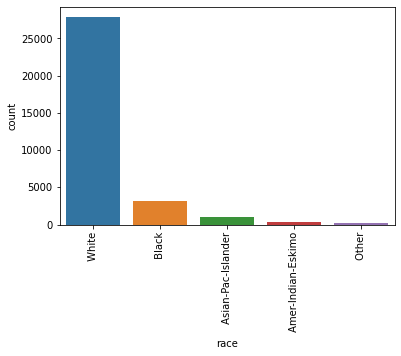

In [28]:
y = sb.countplot(df['race'])
y.set_xticklabels(df['race'].unique(), rotation=90)
plt.show()

In [29]:
# Above plot shows that mostly White people are engagged in working. Plot shows largely biased data towards white people
# as the second highest working crowd is Black and there is huge difference between these two categories.

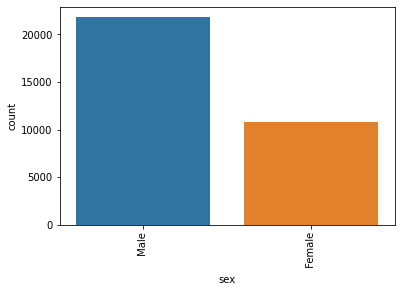

In [30]:
y = sb.countplot(df['sex'])
y.set_xticklabels(df['sex'].unique(), rotation=90)
plt.show()

In [31]:
# Above plot shows that mostly Males are engagged in earning (around 22000) as compared to Females (below 11000).

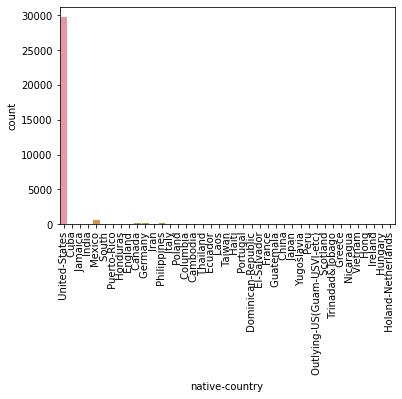

In [32]:
y = sb.countplot(df['native-country'])
y.set_xticklabels(df['native-country'].unique(), rotation=90)
plt.show()

In [33]:
# Above plot shows the data is largely biased for US as majority of population are from US which is quite high (around 29000)
# as compared to other countries which are below 1000

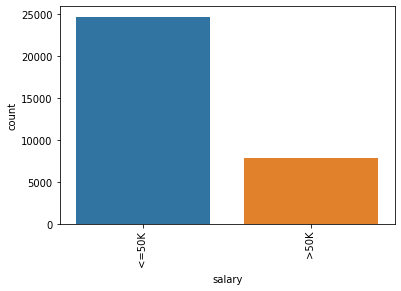

In [34]:
y = sb.countplot(df['salary'])
y.set_xticklabels(df['salary'].unique(), rotation=90)
plt.show()

In [35]:
# above plot shows that majority (around 25000 people) are earning <==50k as compared to people which are earning >50k (around
# 8k)

In [36]:
df['salary'] = df['salary'].replace({' <=50K':0,' >50K':1})

In [37]:
# Lets go for some Bivariate analysis

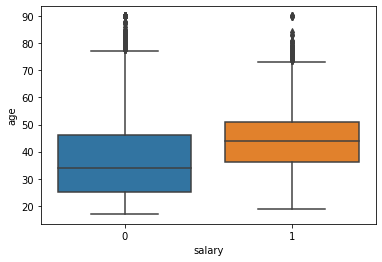

In [38]:
#Age
sb.boxplot(data=df, x='salary',y='age')
plt.show()

In [39]:
# Above plot shows that there are outliers in both categories. Median of population <=50K is less than that of >50K.
# Mean of range <=50K is spread in 50% of the population, which is quite more than in rangeof >50K
df[['salary','age']].groupby(['salary'], as_index=False).mean() # We can see the mean values and justify the above fact

,salary,age
0,0,36.783738
1,1,44.249841


In [40]:
# Let us try to test the above fact by a hypothesis test
# We want to test whether the mean of age of two samples (the two ranges of salary) are same of there is a difference between 
# the mean of ages for the two samples
# For thois, we will do 2 sampled t-Test, Independent t Test for two samples: Its a non parametric test to checj the difference in mean
# for two samples

# H0: the means are significant with no difference, hence no association with salary (Independence)
# H1: the means are non significant, have difference, hence has an association with salary (Dependence)

In [41]:
import random
salary0 = df[df['salary']==0]['age'].tolist() # tolist is done because random.sample needs a sequence/set or list to fetch data 
salary0 = random.sample(salary0, 100)
salary1 = df[df['salary']==1]['age'].tolist() 
salary1 = random.sample(salary1, 100)

from scipy.stats import ttest_ind

ttest, pval = ttest_ind(salary1, salary0, equal_var = False)

print(ttest, pval)

4.251246280531925 3.4512191833731115e-05


In [42]:
# I aboe case, pval<0.05 => We reject the null hypothesis and consider that there is a difference between the means of two 
# samples w.r.t salary, hence age is associated with salary

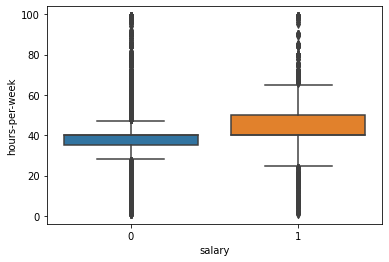

In [43]:
# hours-per-week: 
sb.boxplot(data=df, x='salary', y='hours-per-week')
plt.show()

In [44]:
# Above plot shows that mean of people who earns >50k is more than who earns <=50k. Also, those who earns >50k spends approx
# 44-45 hours, more as compared to those who earns <=50k (approx < 40)

In [45]:
# Lets try t test on hours-per-week w.r.t salary

hpw0 = df[df['salary']==0]['age'].tolist()
hpw0 = random.sample(hpw0, 100)
hpw1 = df[df['salary']==1]['age'].tolist()
hpw1 = random.sample(hpw1, 100)

stats, pval = ttest_ind(hpw1, hpw0)
print(stats, pval)

2.826590651140037 0.0051873501846512885


In [46]:
# pval < 0.05, we reject null hypothesis, which means that hours-per-week is definetly associated with salary and the means of
# two samples (salary:0,1) have a difference w.r.t salary

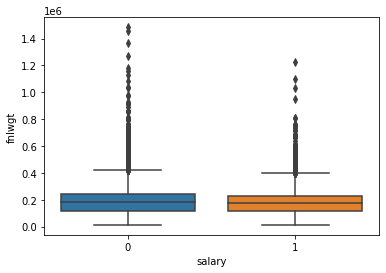

In [47]:
# fnlwgt: 
sb.boxplot(data=df, x='salary', y='fnlwgt')
plt.show()

In [48]:
# Mean seems equal for both categories, leta check it with ttest

In [49]:
# t test on fnlwgthours-per-week w.r.t salary

fnl0 = df[df['salary']==0]['fnlwgt'].tolist()
fnl0 = random.sample(fnl0, 100)
fnl1 = df[df['salary']==1]['fnlwgt'].tolist()
fnl1 = random.sample(fnl1, 100)

stats, pval = ttest_ind(fnl1, fnl0)
print(stats, pval)

-0.6285045875431392 0.5303977770915186


In [50]:
# Pvalue > 0.05, we accept null hypothesis, no difference in means of fnlwgt for categories of salary, no association with
# salary

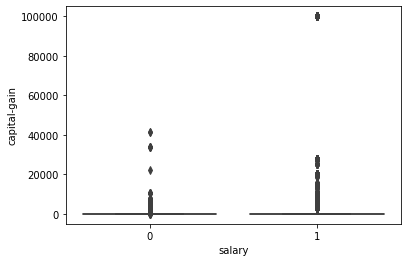

In [51]:
# capital-gain
sb.boxplot(data=df, x='salary', y='capital-gain')
plt.show()

In [52]:
# Plot show there are outliers, and most of the values are concentrated on 0, lets try to find the association with salary

In [53]:
# t test on capital-gain w.r.t salary

cpt0 = df[df['salary']==0]['capital-gain'].tolist()
cpt0 = random.sample(cpt0, 100)
cpt1 = df[df['salary']==1]['capital-gain'].tolist()
cpt1 = random.sample(cpt1, 100)

stats, pval = ttest_ind(cpt1, cpt0)
print(stats, pval)

3.2287481587096676 0.0014554871131239745


In [54]:
# pval<0.05, hence we reject null hypothesis, there is difference between means of capital-loss for samples of salary

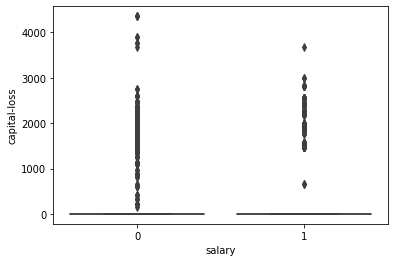

In [55]:
# capital-loss
sb.boxplot(data=df, x='salary', y='capital-loss')
plt.show()

In [56]:
# Plot show there are outliers, and most of the values are concentrated on 0, lets try to find the association with salary

In [57]:
# t test on capital-loss w.r.t salary

cpt0 = df[df['salary']==0]['capital-loss'].tolist()
cpt0 = random.sample(cpt0, 100)
cpt1 = df[df['salary']==1]['capital-loss'].tolist()
cpt1 = random.sample(cpt1, 100)

stats, pval = ttest_ind(cpt1, cpt0)
print(stats, pval)

1.2148724032083413 0.2258615315240498


In [58]:
# pval>0.05 , hence we accept null hypothesis, there is no difference between means of capital-loss for samples of salary

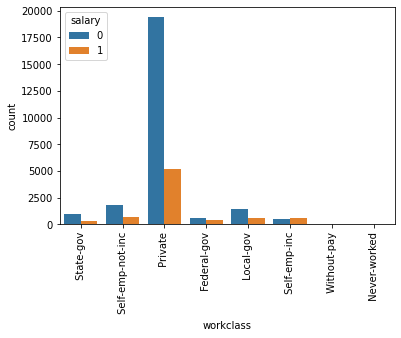

In [59]:
# workclass
x = sb.countplot(df['workclass'], hue=df['salary'])
x.set_xticklabels(df['workclass'].unique(), rotation=90)
plt.show()

In [60]:
# above plot shows highest earning workclass is Private where maximum people earn <=50K (group 0). Ony self employee inc has
# more number of people who earn>50K as compared to those who earn <=50k

In [61]:
# let us try to find its association with salary by Chi Sq. Test
# Ho: Significant, There is no relation between workclass and salary
# H1: Non Significant, there is relation

ctb = pd.crosstab(df['workclass'], df['salary'], margins=False)
#ctb
from scipy.stats import chi2_contingency
stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval)

923.5975186738007 3.848177814824396e-195


In [62]:
# as pvalue > 0.05, we accept null hypothesis and conclude that workclass and salary are not dependent

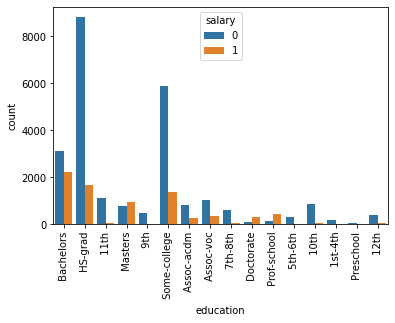

In [63]:
# education: salary
a = sb.countplot(data=df, x='education',hue='salary')
a.set_xticklabels(df['education'].unique(), rotation=90)
plt.show()

In [64]:
# Maximum HS-grad people are engagged in earning out of which most people earn <=50k which is quite high as compared to people 
# who earn >50k, followed by some-college. Doctorate and Prof-school people are the only education sectors where number of 
# people who earn >50k is more than those who earn <=50k.

# To chech education and salary dependenct, we perform chi sq test

ctb = pd.crosstab(df['education'], df['salary'], margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval)

4429.653302288619 0.0


In [65]:
# as pvalue < 0.05, we reject null hypothesis and conclude that edcucation and salary ARE dependent

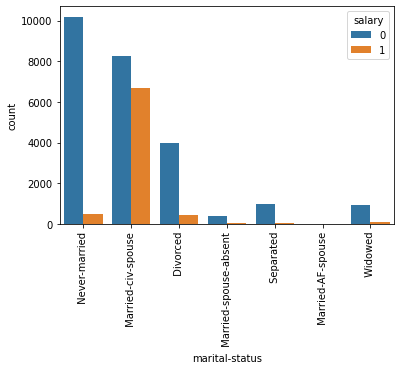

In [66]:
# marital-status : salary
a = sb.countplot(data=df, x='marital-status',hue='salary')
a.set_xticklabels(df['marital-status'].unique(), rotation=90)
plt.show()

In [67]:
# Married-civ-spouse has the highest percentage of falling under the income group 1(>50k).
# Only few (around 2%) of the people of "Never-married" earn more than 50k. Married-spouse-absent and Married-AF-spouse has
# negligible contribution to the fall under income group 1.

ctb = pd.crosstab(df['marital-status'].sample(frac=0.002, random_state=1, replace=True), df['salary'].sample(frac=0.002, random_state=1, replace=True), margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval, dof)

18.57751197963462 0.000951277878166348 4


In [68]:
# as pvalue < 0.05, we reject null hypothesis and conclude that marital-status and salary ARE dependent

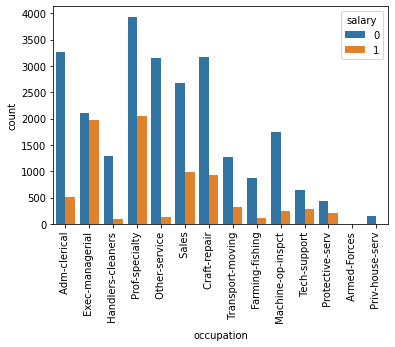

In [69]:
# occupation
a = sb.countplot(data=df, x='occupation',hue='salary')
a.set_xticklabels(df['occupation'].unique(), rotation=90)
plt.show()

In [70]:
# Above plot shows that all the groups have more people earning<=50k as compared to those who earn <50k. Prof-Speciality show
# maximum crowd as compared to all others. No group have more people who earn>50k than those wo earn <=50k. Other services 
# have maximu difference between salary groups
ctb = pd.crosstab(df['occupation'].sample(frac=0.002, random_state=1, replace=True), df['salary'].sample(frac=0.002, random_state=1, replace=True), margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval, dof)

8.078544882790165 0.706251082565589 11


In [71]:
# pvale > 0.05, we accept null hypothesis, there is no relation between occupation and salary.

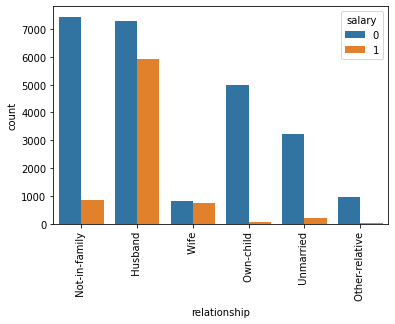

In [72]:
# relationship
a = sb.countplot(data=df, x='relationship',hue='salary')
a.set_xticklabels(df['relationship'].unique(), rotation=90)
plt.show()

In [73]:
# Husband category has maximum crowd of all froups. HUsband and wif groups have less difference between the salary 
# groups 0 and 1. In all groups, more people there in group who earn <=50k as compared to those who earn >50k (very big 
# difference)

ctb = pd.crosstab(df['relationship'].sample(frac=0.002, random_state=1, replace=True), df['salary'].sample(frac=0.002, random_state=1, replace=True), margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval, dof)

19.678448775239985 0.000577932808033722 4


In [74]:
# pvalue<0.05 so we reject null hypothesis, both attributes are dependent

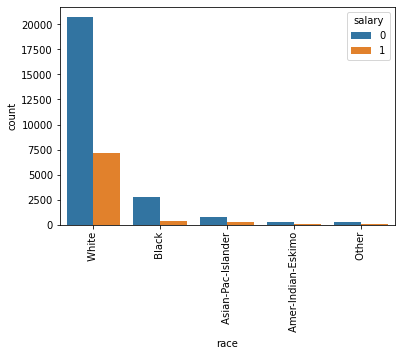

In [75]:
# race
a = sb.countplot(data=df, x='race',hue='salary')
a.set_xticklabels(df['race'].unique(), rotation=90)
plt.show()

In [76]:
# Most crowd is present in white group of overall groups. Every group has people earning <=50k are more as compared to those
# who earn >50k
ctb = pd.crosstab(df['race'].sample(frac=0.002, random_state=1, replace=True),
                  df['salary'].sample(frac=0.002, random_state=1, replace=True), margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval, dof)

1.1174544940268212 0.8914930602585001 4


In [77]:
# pvalue > 0.05, accept H0, there is no dependency in race and salary

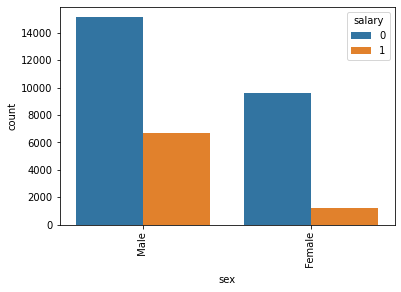

In [78]:
# sex
a = sb.countplot(data=df, x='sex',hue='salary')
a.set_xticklabels(df['sex'].unique(), rotation=90)
plt.show()

In [79]:
# Females earning >50k as compared to males are not present. People earning <=50k are greater than those earning >50k.
ctb = pd.crosstab(df['sex'].sample(frac=0.003, random_state=1, replace=True),
                  df['salary'].sample(frac=0.003, random_state=1, replace=True), margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval, dof)

4.782764867566217 0.028745931148544398 1


In [80]:
# pvalue <0.05, we reject the null hypothesis, there is dependency between sex and salary

In [81]:
# native-country: As seen earlier, it is largely biased to US country
ctb = pd.crosstab(df['native-country'].sample(frac=0.003, random_state=1, replace=True),
                  df['salary'].sample(frac=0.003, random_state=1, replace=True), margins=False)

stat, pval, dof, exp = chi2_contingency(ctb)
print(stat, pval, dof)

11.676167929292928 0.16624777915851172 8


In [82]:
# pval>0.05, we accept null hypothesis, there is no dependency between native-country and salary

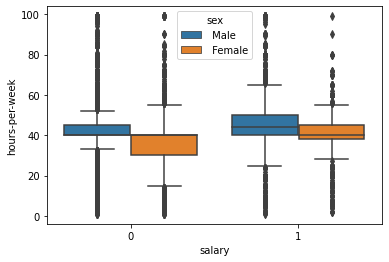

In [83]:
# Let us compare relationship between "salary", "hours-per-week", "sex"
sb.boxplot(data=df, x='salary', y='hours-per-week', hue='sex')
plt.show()

In [84]:
# Above plot shows, for salary group earning >50k, Males have more flexible working hours as compared to females
# For group earning <=50k, females have more flexible hours

In [85]:
# In this way we can have more analysis depending upon the need. Conclusions can be extracted from individual analysis.

In [86]:
# Let us build a prediction model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [90]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [89]:
df1 = df
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [93]:
# Encode the required attributes
df1['workclass'] = le.fit_transform(df1['workclass'])
df1['education'] = le.fit_transform(df1['education'])
df1['marital-status'] = le.fit_transform(df1['marital-status'])
df1['occupation'] = le.fit_transform(df1['occupation'])
df1['relationship'] = le.fit_transform(df1['relationship'])
df1['race'] = le.fit_transform(df1['race'])
df1['sex'] = df1['sex'].replace({' Male':0, ' Female':1})
df1['native-country'] = le.fit_transform(df1['native-country'])
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,9,13,4,0,1,4,0,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,0,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,0,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,0,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,1,0,0,40,4,0


In [97]:
# prepare input and output
dfi = df1.iloc[:,:-1]
dfo = df1['salary']

In [99]:
# train and get the score
dtc.fit(dfi,dfo)
dtc.score(dfi,dfo)
# This is giving a good score

0.9999692884125181

In [101]:
# Lets do the same with train and test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfi,dfo, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22792, 14) (9769, 14) (22792,) (9769,)


In [102]:
dtc.fit(X_train, y_train) # fit data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [103]:
dtc.score(X_train, y_train) #get score

1.0

In [111]:
# predict
y_pred = dtc.predict(X_test)

dfp = pd.DataFrame({'Salary_Actual':y_test, 'Salary_Pred':y_pred})
dfp.head(2)

,Salary_Actual,Salary_Pred
4185,0,1
29902,0,0


In [121]:
# Mannual check
dfp.groupby(['Salary_Actual', 'Salary_Pred'])['Salary_Pred'].count()

Salary_Actual  Salary_Pred
0              0              6503
               1               945
1              0               863
               1              1458
Name: Salary_Pred, dtype: int64

In [123]:
(6503+1458)/dfp.shape[0] # Actual Score: Can be considered a good score

0.8149247620022521

In [114]:
# Check cofusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [126]:
print("Confusion Matrix :")
print(confusion_matrix(dfp['Salary_Actual'], dfp['Salary_Pred']))
print('============================================================')
print("Accuracy Score :", accuracy_score(dfp['Salary_Actual'], dfp['Salary_Pred'])) # Confirmed the score
print('============================================================')
print(classification_report(dfp['Salary_Actual'], dfp['Salary_Pred']))

Confusion Matrix :
[[6503  945]
 [ 863 1458]]
Accuracy Score : 0.8149247620022521
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7448
           1       0.61      0.63      0.62      2321

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.81      0.82      9769



In [ ]:
# Like wise we can test the scores for different classification algorithms and depending on the best scores and requirement,we
# can select the best suited algorithm for the dataset.